<a href="https://colab.research.google.com/github/Alirez1043/DeepLearning/blob/main/Assighments/2/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import** **Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense ,Activation, Dropout ,Flatten,Conv2D ,MaxPooling2D 
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import sys

# **Import Useful Functions**

In [2]:
!git clone https://github.com/Alirez1043/Machine-Learning.git
sys.path.insert(1 ,"Machine-Learning/Colab")
import plot_history
import save_model_summary as save_model

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 28 (delta 3), reused 8 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


# **Loading Data**

In [3]:
np.random.seed(60)
tf.random.set_seed(60)

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


View OF Data

In [4]:
print("_____TRAIN________")
print("train_images_Shape" ,train_images.shape)
print("train_labels_Shape" ,train_labels.shape)
print("\n_____TEST________")
print("test_images_Shape" ,test_images.shape)
print("test_labels_Shape" ,test_labels.shape)

print("------------------\nNumber of Classes = {}".format(train_labels.max()+1))

_____TRAIN________
train_images_Shape (60000, 28, 28)
train_labels_Shape (60000,)

_____TEST________
test_images_Shape (10000, 28, 28)
test_labels_Shape (10000,)
------------------
Number of Classes = 10


# **Data Nrmalization**

In [5]:
x_train = train_images/255.0
x_test = test_images/255.0

Plot RGB Figures

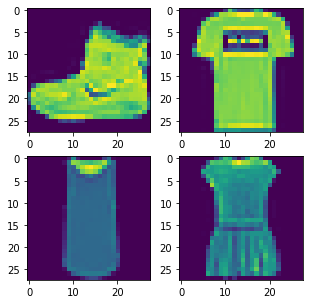

In [6]:
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

Plot Gray Figures

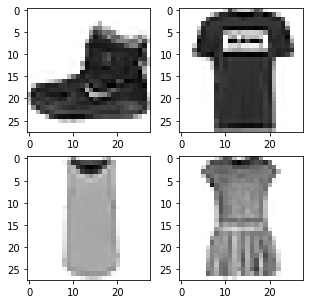

In [7]:
plt.figure(figsize=(5,5))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

# **Make_Model_Function**

In [8]:
num_classes = train_labels.max() + 1
y_train = to_categorical(train_labels, num_classes=num_classes)
y_test = to_categorical(test_labels, num_classes=num_classes)


def make_model():
    model = Sequential()
    model.add(Conv2D(40 ,(3,3) ,activation = 'relu'  ,input_shape = (28,28,1)))
    model.add(MaxPooling2D(2 ,2))
    model.add(Conv2D(60 ,(3,3) ,activation = 'relu' ))
    model.add(MaxPooling2D(2 ,2))
    model.add(Conv2D(80 ,(3,3) ,activation = 'relu' ))
    model.add(MaxPooling2D(2 ,2))
    model.add(Flatten())
    model.add(Dense(200 ,activation = 'relu'))
    model.add(Dense(100 ,activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes ,activation = 'softmax'))

    return model


Look at Model

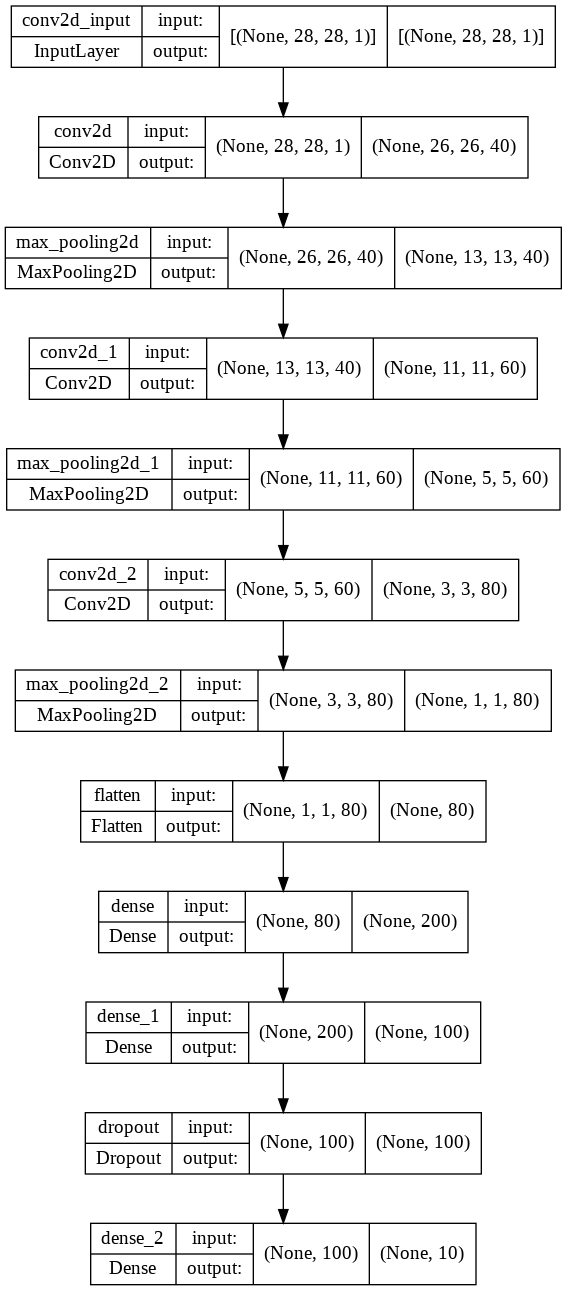

In [9]:
model = make_model()
keras.utils.plot_model(model, "Functional_API.png", show_shapes=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 40)        400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 40)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 60)        21660     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 60)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 80)          43280     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 80)         0

Compile with RMSPROP Optimizer

In [28]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer , loss = 'categorical_crossentropy' ,metrics = ['acc'])

In [ ]:
history = model.fit(x_train ,y_train ,batch_size = 25 ,epochs = 25 ,validation_split = 0.2)

# Plot **Results**

In [ ]:
import plot_history 
plot_history.plot_history(history ,save_fig = True ,fig_id = "fig-1")

In [27]:
save_model.save_model_summary(model, history)